In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import os
import sys
sys.path.append(os.path.abspath("../../src"))   
import soporte_regresion as f
pd.options.display.float_format = "{:,.2f}".format 
pd.set_option("display.max_columns", None)

In [2]:
df_encoded=pd.read_csv("../../datos/datos3/datos_sin_outliers_iterativo.csv", index_col=0).reset_index(drop=True)

In [3]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   price                             424 non-null    float64
 1   size_MinMax                       424 non-null    float64
 2   bathrooms_MinMax                  424 non-null    float64
 3   province_MinMax                   424 non-null    float64
 4   municipality_MinMax               424 non-null    float64
 5   distance_MinMax                   424 non-null    float64
 6   district_MinMax                   424 non-null    float64
 7   propertyType_chalet_MinMax        424 non-null    float64
 8   propertyType_countryHouse_MinMax  424 non-null    float64
 9   propertyType_duplex_MinMax        424 non-null    float64
 10  propertyType_flat_MinMax          424 non-null    float64
 11  propertyType_penthouse_MinMax     424 non-null    float64
 12  property

In [4]:
df_encoded.head()

,price,size_MinMax,bathrooms_MinMax,province_MinMax,municipality_MinMax,distance_MinMax,district_MinMax,propertyType_chalet_MinMax,propertyType_countryHouse_MinMax,propertyType_duplex_MinMax,propertyType_flat_MinMax,propertyType_penthouse_MinMax,propertyType_studio_MinMax,exterior_False_MinMax,exterior_True_MinMax,rooms_0_MinMax,rooms_1_MinMax,rooms_2_MinMax,rooms_3_MinMax,rooms_4_MinMax,status_desconocido_MinMax,status_good_MinMax,status_newdevelopment_MinMax,status_renew_MinMax,floor_1_MinMax,floor_14_MinMax,floor_2_MinMax,floor_3_MinMax,floor_4_MinMax,floor_5_MinMax,floor_6_MinMax,floor_7_MinMax,floor_8_MinMax,floor_bj_MinMax,floor_desconocido_MinMax,floor_en_MinMax,floor_ss_MinMax,floor_st_MinMax,hasLift_False_MinMax,hasLift_True_MinMax,hasLift_desconocido_MinMax,parkingSpace_False_MinMax,parkingSpace_True_MinMax,parkingSpace_desconocido_MinMax,outliers_ifo_0.01_100,outliers_ifo_0.01_400,outliers_ifo_0.01_1000,outliers_ifo_0.01_2000,outliers_ifo_0.05_100,outliers_ifo_0.05_400,outliers_ifo_0.05_1000,outliers_ifo_0.05_2000,outliers_ifo_0.1_100,outliers_ifo_0.1_400,outliers_ifo_0.1_1000,outliers_ifo_0.1_2000
0,750.00,0.31,0.92,1.00,1.00,0.11,0.87,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
1,750.00,0.39,0.92,1.00,0.73,0.27,0.85,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
2,400.00,0.36,0.00,1.00,0.09,0.92,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,-1.00,-1.00,-1.00,-1.00
3,450.00,0.53,0.92,0.00,0.17,0.79,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,-1.00,-1.00,-1.00,-1.00
4,450.00,0.31,0.92,0.00,0.23,0.64,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Separamos en x e y

In [5]:
x= df_encoded.drop(columns="price")
y= df_encoded[["price"]]

In [6]:
x.head()

,size_MinMax,bathrooms_MinMax,province_MinMax,municipality_MinMax,distance_MinMax,district_MinMax,propertyType_chalet_MinMax,propertyType_countryHouse_MinMax,propertyType_duplex_MinMax,propertyType_flat_MinMax,propertyType_penthouse_MinMax,propertyType_studio_MinMax,exterior_False_MinMax,exterior_True_MinMax,rooms_0_MinMax,rooms_1_MinMax,rooms_2_MinMax,rooms_3_MinMax,rooms_4_MinMax,status_desconocido_MinMax,status_good_MinMax,status_newdevelopment_MinMax,status_renew_MinMax,floor_1_MinMax,floor_14_MinMax,floor_2_MinMax,floor_3_MinMax,floor_4_MinMax,floor_5_MinMax,floor_6_MinMax,floor_7_MinMax,floor_8_MinMax,floor_bj_MinMax,floor_desconocido_MinMax,floor_en_MinMax,floor_ss_MinMax,floor_st_MinMax,hasLift_False_MinMax,hasLift_True_MinMax,hasLift_desconocido_MinMax,parkingSpace_False_MinMax,parkingSpace_True_MinMax,parkingSpace_desconocido_MinMax,outliers_ifo_0.01_100,outliers_ifo_0.01_400,outliers_ifo_0.01_1000,outliers_ifo_0.01_2000,outliers_ifo_0.05_100,outliers_ifo_0.05_400,outliers_ifo_0.05_1000,outliers_ifo_0.05_2000,outliers_ifo_0.1_100,outliers_ifo_0.1_400,outliers_ifo_0.1_1000,outliers_ifo_0.1_2000
0,0.31,0.92,1.00,1.00,0.11,0.87,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
1,0.39,0.92,1.00,0.73,0.27,0.85,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
2,0.36,0.00,1.00,0.09,0.92,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,-1.00,-1.00,-1.00,-1.00
3,0.53,0.92,0.00,0.17,0.79,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,-1.00,-1.00,-1.00,-1.00
4,0.31,0.92,0.00,0.23,0.64,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [7]:
y.head()

,price
0,750.00
1,750.00
2,400.00
3,450.00
4,450.00


Separamos en train y test y le hacemos aprender

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.7, random_state=42)
modelo_lineal= LinearRegression()
modelo_lineal.fit(x_train, y_train) 

LinearRegression()

Ahora hacemos la predicción

In [9]:
y_test_pred=modelo_lineal.predict(x_test)         #con esto predice un precio
y_train_pred= modelo_lineal.predict(x_train)

In [10]:
metricas = {
    'train': {
        'r2_score': r2_score(y_train, y_train_pred),
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'MSE': mean_squared_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
    },
    'test': {
        'r2_score': r2_score(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

    }
}

In [11]:
metricas_pd=pd.DataFrame(metricas)

In [12]:
metricas_pd.head().T

,r2_score,MAE,MSE,RMSE
train,0.68,36.87,"2,243.46",47.37
test,0.58,40.20,"2,821.82",53.12


In [13]:
metricas_pd.reset_index(inplace=True)

In [14]:
metricas_pd.T

,0,1,2,3
index,r2_score,MAE,MSE,RMSE
train,0.68,36.87,"2,243.46",47.37
test,0.58,40.20,"2,821.82",53.12


Dado que coinciden bastante las RMSE, no se está dando un gran over fitting 

Vamos a intentar visualizar las cositas

In [15]:
predytets=pd.DataFrame(y_test_pred, columns=["y_test_pred"])

In [16]:
predytrain=pd.DataFrame(y_train_pred, columns=["y_train_pred"])

In [17]:
df_fin=pd.DataFrame()
df_fin=pd.concat([df_fin, predytets, predytrain, y], ignore_index=True, axis=1)

In [18]:
df_fin.columns= ["test pre", "train pre", "precio"]

In [19]:
df_fin.reset_index(inplace=True)

VOY A PROBAR COGIENDO UN 80 DE ENTRENAMIENTO

In [20]:
x_train80, x_test80, y_train80, y_test80 = train_test_split(x, y, train_size= 0.8, random_state=42)
modelo_lineal80= LinearRegression()
modelo_lineal80.fit(x_train80, y_train80) 

LinearRegression()

Ahora hacemos la predicción

In [21]:
y_test_pred80=modelo_lineal80.predict(x_test80)         #con esto predice un precio
y_train_pred80= modelo_lineal80.predict(x_train80)

In [22]:
metricas80 = {
    'train': {
        'r2_score': r2_score(y_train80, y_train_pred80),
        'MAE': mean_absolute_error(y_train80, y_train_pred80),
        'MSE': mean_squared_error(y_train80, y_train_pred80),
        'RMSE': np.sqrt(mean_squared_error(y_train80, y_train_pred80))
    },
    'test': {
        'r2_score': r2_score(y_test80, y_test_pred80),
        'MAE': mean_absolute_error(y_test80, y_test_pred80),
        'MSE': mean_squared_error(y_test80, y_test_pred80),
        'RMSE': np.sqrt(mean_squared_error(y_test80, y_test_pred80))

    }
}

In [23]:
metricas80_pd=pd.DataFrame(metricas80)

In [24]:
metricas80_pd.head().T

,r2_score,MAE,MSE,RMSE
train,0.68,37.01,"2,309.71",48.06
test,0.59,39.34,"2,469.10",49.69


In [25]:
metricas80_pd.reset_index(inplace=True)

In [26]:
metricas80_pd

,index,train,test
0,r2_score,0.68,0.59
1,MAE,37.01,39.34
2,MSE,"2,309.71","2,469.10"
3,RMSE,48.06,49.69


Se está dando over fitting y under fitting asi que mejor el de 70% train 30% test

Vamos a intentar visualizar las cositas

In [27]:
predytets80=pd.DataFrame(y_test_pred80, columns=["y_test_pred80"])

In [28]:
predytrain80=pd.DataFrame(y_train_pred80, columns=["y_train_pred80"])

In [29]:
df_fin80=pd.DataFrame()
df_fin80=pd.concat([df_fin80, predytets80, predytrain80, y], ignore_index=True, axis=1)

In [30]:
df_fin80.columns= ["test pre80", "train pre80", "precio"]

In [31]:
df_fin80.reset_index(inplace=True)

<Figure size 1000x800 with 0 Axes>

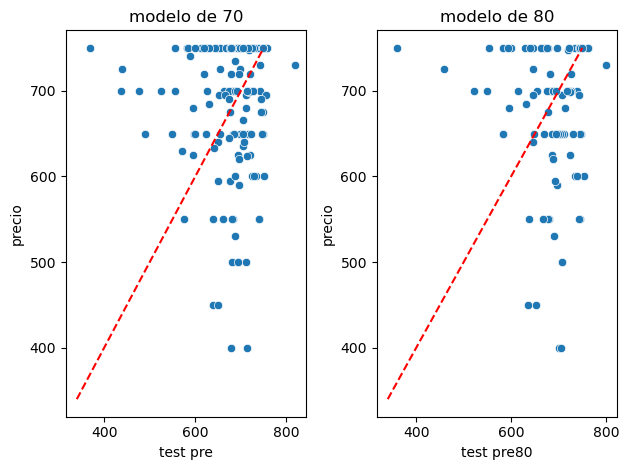

In [32]:
plt.figure(figsize=(10,8))
fig, axes =plt.subplots(nrows=1, ncols=2)
axes=axes.flat

sns.scatterplot(x="test pre", y="precio", data= df_fin, ax=axes[0])
axes[0].plot([df_fin["precio"].min(), df_fin["precio"].max()],
         [df_fin["precio"].min(), df_fin["precio"].max()],
         color='red', linestyle='--', label='x = y')
axes[0].set_title("modelo de 70")



sns.scatterplot(x="test pre80", y="precio", data= df_fin80, ax= axes[1])
axes[1].plot([df_fin80["precio"].min(), df_fin80["precio"].max()],
         [df_fin80["precio"].min(), df_fin80["precio"].max()],
         color='red', linestyle='--', label='x = y')
axes[1].set_title("modelo de 80")
plt.tight_layout()

In [33]:
metricas_pd

,index,train,test
0,r2_score,0.68,0.58
1,MAE,36.87,40.20
2,MSE,"2,243.46","2,821.82"
3,RMSE,47.37,53.12


In [34]:
metricas80_pd

,index,train,test
0,r2_score,0.68,0.59
1,MAE,37.01,39.34
2,MSE,"2,309.71","2,469.10"
3,RMSE,48.06,49.69


DEFINITIVAMENTE, nos quedamos con el modelo de 70% train.

Creamos un dataframe con el valor real y los residuos para ambas formas de entrenar 

In [35]:
df_residuos= y_test_pred - y_test
df_residuos80= y_test_pred80 - y_test80

In [36]:
df_con_residuos=pd.DataFrame()
df_con_residuos=pd.concat([df_con_residuos,df_residuos, y_test], ignore_index=True, axis=1)

df_con_residuos80=pd.DataFrame()
df_con_residuos80=pd.concat([df_con_residuos80,df_residuos80, y_test80], ignore_index=True, axis=1)

In [37]:
df_con_residuos.columns=["residuo", "precio original"]
df_con_residuos80.columns=["residuo80", "precio original80"]

In [38]:
df_con_residuos.head()

,residuo,precio original
145,-47.96,630.00
280,-117.35,700.00
175,77.95,600.00
373,-61.07,700.00
420,-50.49,700.00


In [39]:
df_con_residuos80.head()

,residuo80,precio original80
145,-47.58,630.00
280,-101.15,700.00
175,100.79,600.00
373,-64.23,700.00
420,-47.47,700.00


<Figure size 1000x1800 with 0 Axes>

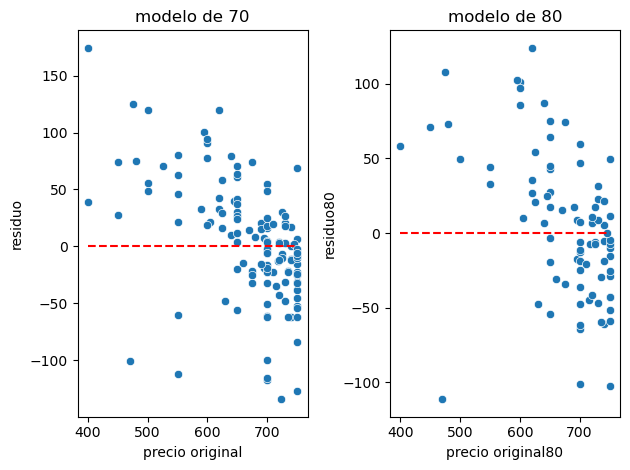

In [40]:
plt.figure(figsize=(10,18))
fig, axes =plt.subplots(nrows=1, ncols=2)
axes=axes.flat


sns.scatterplot(x="precio original", y="residuo", data= df_con_residuos, ax= axes[0])
axes[0].plot([df_con_residuos["precio original"].min(), df_con_residuos["precio original"].max()],
         [0,0],
         color='red', linestyle='--', label='x = y')
axes[0].set_title("modelo de 70")



sns.scatterplot(x="precio original80", y="residuo80", data= df_con_residuos80, ax=axes[1])
axes[1].plot([df_con_residuos80["precio original80"].min(), df_con_residuos80["precio original80"].max()],
         [0,0],
         color='red', linestyle='--', label='x = y')

axes[1].set_title("modelo de 80")
plt.tight_layout()

Aquí observamos como los residuos se alejan de la línea 0 que representa que no haya diferencias entre los valores predichos y los valores reales

## Con todo lo anterior hemos comprobado que el precio no presenta una relación lineal